In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023-10-05-2023-10-17-Middle_East-Israel-Palestine.csv')

In [ ]:
df.head(5)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,ISR16432,13 October 2023,2023,1,Political violence,Battles,Armed clash,Hezbollah,NaN,3,...,Kefar Giladi,33.2423,35.5752,2,Haaretz; Jerusalem Post; N12; Times of Israel;...,National,"On 13 October 2023, Hezbollah militants opened...",0,NaN,1697503881
1,ISR16433,13 October 2023,2023,1,Political violence,Battles,Armed clash,Hezbollah,NaN,3,...,Hanita,33.0875,35.1736,2,Haaretz; Jerusalem Post; N12; Times of Israel,National,"On 13 October 2023, Hezbollah militants caused...",0,NaN,1697503881
2,ISR16434,13 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Israel (2022-),NaN,1,...,Ziqim,31.6068,34.5215,2,N12,National,"On 13 October 2023, Israeli military forces ki...",1,NaN,1697503881
3,ISR16435,13 October 2023,2023,1,Political violence,Battles,Armed clash,Military Forces of Israel (2022-),NaN,1,...,Ashqelon,31.6693,34.5715,1,Jerusalem Post,National,"On 13 October 2023, Israeli military forces ki...",1,NaN,1697503881
4,ISR16438,13 October 2023,2023,1,Political violence,Explosions/Remote violence,Shelling/artillery/missile attack,Hamas Movement,NaN,3,...,Rehovot,31.8942,34.8120,1,Haaretz; Israeli Defense Forces; Mynet; N12; S...,Other-National,"On 13 October 2023, Hamas militants fired barr...",0,NaN,1697503881


**1.Data Wrangling**

In [ ]:
# findinf the shape of the data
df.shape

(1200, 31)

In [ ]:
#check if there any null value
df.isnull().sum()

event_id_cnty            0
event_date               0
year                     0
time_precision           0
disorder_type            0
event_type               0
sub_event_type           0
actor1                   0
assoc_actor_1         1066
inter1                   0
actor2                 267
assoc_actor_2         1084
inter2                   0
interaction              0
civilian_targeting     849
iso                      0
region                   0
country                  0
admin1                   1
admin2                   2
admin3                 870
location                 0
latitude                 0
longitude                0
geo_precision            0
source                   0
source_scale             0
notes                    0
fatalities               0
tags                   846
timestamp                0
dtype: int64

the null values in columns that not used in this study

In [ ]:
#ind duplicate rows across all of the columns
duplicateRows = df[df.duplicated()]
duplicateRows

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp


**2.Data Analysis**

In [ ]:
df.describe()

,year,time_precision,inter1,inter2,interaction,iso,latitude,longitude,geo_precision,fatalities,timestamp
count,1200.0,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03
mean,2023.0,1.000833,4.934167,4.970000,51.094167,302.775000,31.745675,34.825066,1.373333,1.440000,1.697486e+09
std,0.0,0.028868,2.497004,3.195196,23.122266,45.116745,1.002379,1.074897,0.499162,9.016882,1.032628e+05
min,2023.0,1.000000,1.000000,0.000000,10.000000,275.000000,0.000000,0.000000,1.000000,0.000000,1.696882e+09
25%,2023.0,1.000000,3.000000,3.000000,37.000000,275.000000,31.496400,34.475100,1.000000,0.000000,1.697504e+09
50%,2023.0,1.000000,5.000000,7.000000,58.000000,275.000000,31.643250,34.970600,1.000000,0.000000,1.697504e+09
75%,2023.0,1.000000,8.000000,8.000000,78.000000,376.000000,32.035400,35.203800,2.000000,0.000000,1.697504e+09
max,2023.0,2.000000,8.000000,8.000000,80.000000,376.000000,33.279200,35.579500,3.000000,260.000000,1.697504e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       1200 non-null   object 
 1   event_date          1200 non-null   object 
 2   year                1200 non-null   int64  
 3   time_precision      1200 non-null   int64  
 4   disorder_type       1200 non-null   object 
 5   event_type          1200 non-null   object 
 6   sub_event_type      1200 non-null   object 
 7   actor1              1200 non-null   object 
 8   assoc_actor_1       134 non-null    object 
 9   inter1              1200 non-null   int64  
 10  actor2              933 non-null    object 
 11  assoc_actor_2       116 non-null    object 
 12  inter2              1200 non-null   int64  
 13  interaction         1200 non-null   int64  
 14  civilian_targeting  351 non-null    object 
 15  iso                 1200 non-null   int64  
 16  region

In [ ]:
#convert the event_date column into datetime type.
df['event_date'] = pd.to_datetime(df['event_date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id_cnty       1200 non-null   object        
 1   event_date          1200 non-null   datetime64[ns]
 2   year                1200 non-null   int64         
 3   time_precision      1200 non-null   int64         
 4   disorder_type       1200 non-null   object        
 5   event_type          1200 non-null   object        
 6   sub_event_type      1200 non-null   object        
 7   actor1              1200 non-null   object        
 8   assoc_actor_1       134 non-null    object        
 9   inter1              1200 non-null   int64         
 10  actor2              933 non-null    object        
 11  assoc_actor_2       116 non-null    object        
 12  inter2              1200 non-null   int64         
 13  interaction         1200 non-null   int64       

In [ ]:
df['event_date'].max


<bound method NDFrame._add_numeric_operations.<locals>.max of 0     2023-10-06
1     2023-10-06
2     2023-10-06
3     2023-10-06
4     2023-10-06
         ...    
875   2023-09-01
876   2023-09-01
877   2023-09-01
878   2023-09-01
879   2023-09-01
Name: event_date, Length: 880, dtype: datetime64[ns]>

In [ ]:
df['actor1'].value_counts()

Military Forces of Israel (2022-)                      547
Rioters (Palestine)                                    263
Hamas Movement                                         139
Unidentified Armed Group (Palestine)                    72
Rioters (Israel)                                        56
Settlers (Israel)                                       33
Protesters (Palestine)                                  32
Katibat Jenin                                            9
Katibat Tulkarm                                          7
Police Forces of Israel (2022-)                          7
Hezbollah                                                6
Government of Israel (2022-)                             4
Katibat Al Fajr                                          3
Protesters (Israel)                                      2
Al Aqsa Martyrs Brigade                                  2
Katibat Tubas                                            2
Unidentified Armed Group (Syria)                        

In [ ]:
Palestine = ['Rioters (Palestine)' , 'Hamas Movement' , 'Unidentified Armed Group (Palestine)' ,  'Protesters (Palestine)' , 'Katibat Jenin' , 'Katibat Tulkarm', 'Katibat Al Fajr', 'Al Aqsa Martyrs Brigade' , 'Katibat Tubas', 'Katibat Jaba', 'Katibat Jericho' , 'PFLP: Popular Front for the Liberation of Palestine', 'Katibat Nablus', 'Katibat Bayt Ummar']

In [ ]:
israel = ['Military Forces of Israel (2022-)', 'Rioters (Israel)', 'Settlers (Israel)' , 'Police Forces of Israel (2022-)', 'Government of Israel (2022-)' , 'Protesters (Israel)' , 'Police Forces of Israel (2022-) Border Police' , 'Military Forces of Israel (2022-) Special Forces', 'Police Forces of Israel (2022-) Yamam' ]

In [ ]:
Other = ['Hezbollah' , 'Unidentified Armed Group (Syria)' , 'Military Forces of Lebanon (2021-)', 'Unidentified Armed Group (Lebanon)' ]

In [ ]:
def attack_fen(value):
  if value in Palestine:
    return 'palestine'
  elif value in israel:
    return 'israel'
  else:
    return 'other'

In [ ]:
df['attack'] = df['actor1'].map(attack_fen)

In [ ]:
df['attack'].value_counts()

israel       653
palestine    535
other         12
Name: attack, dtype: int64

In [ ]:
df['attack'].value_counts()

palestine    499
israel       374
other          7
Name: attack, dtype: int64

In [ ]:
df['disorder_type'].value_counts()

Political violence                    978
Strategic developments                123
Demonstrations                         98
Political violence; Demonstrations      1
Name: disorder_type, dtype: int64

'English' | 'Arabic'

'Political violence'   | 'العنف السياسي

Demonstrations       | المظاهرات  

Strategic developments | التطورات الاستراتيجية

**3.Data Visualization**

In [ ]:
df['event_type'].value_counts()

Explosions/Remote violence    450
Riots                         319
Battles                       167
Strategic developments        123
Violence against civilians    107
Protests                       34
Name: event_type, dtype: int64

Explosions/Remote violence | الانفجارات/العنف عن بعد

 Riots | اعمال الشغب

 المعارك| Battles

التطورات الاستراتيجية |Strategic developments

العنف ضد المدنيين | Violence against civilians

الاحتجاجات |Protests

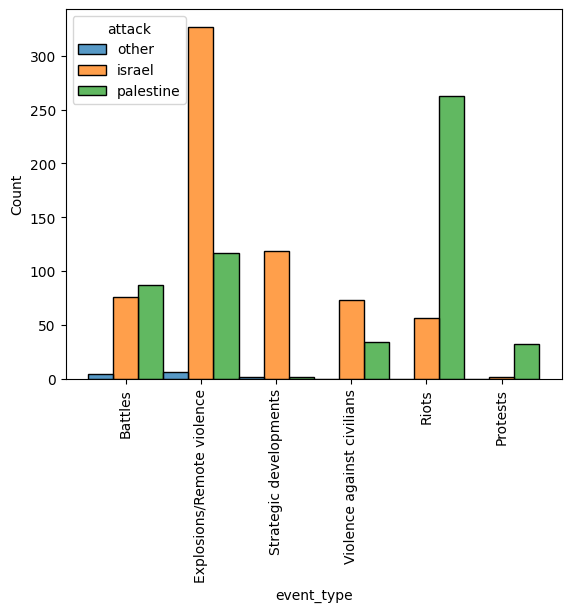

In [ ]:
sns.histplot(binwidth=1,
            x='event_type',
            hue='attack',
            data=df,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90);

In [ ]:
#the_first_group= df.groupby(['event_type'])['attack'].count()

In [ ]:
#the_first_group.head(5)

In [ ]:
df['sub_event_type'].value_counts()

Air/drone strike                       290
Mob violence                           254
Armed clash                            161
Shelling/artillery/missile attack      157
Attack                                 106
Disrupted weapons use                   77
Violent demonstration                   65
Peaceful protest                        31
Change to group/activity                18
Other                                   16
Looting/property destruction             9
Arrests                                  3
Government regains territory             3
Non-state actor overtakes territory      3
Remote explosive/landmine/IED            2
Protest with intervention                2
Excessive force against protesters       1
Grenade                                  1
Abduction/forced disappearance           1
Name: sub_event_type, dtype: int64

Air/drone strike       | ضربة جوية/طائرة بدون طيار
Mob violence            | عنف الغوغاء
Armed clash              | اشتباك مسلح
Shelling/artillery/missile attack  | قصف / مدفعي / هجوم صاروخي
Attack                               | هجوم
Disrupted weapons use        | تعطل استخدام الأسلحة
Violent demonstration           | مظاهرة عنيفة
Peaceful protest                      |الاحتجاج السلمي
Change to group/activity       | التغيير إلى المجموعة/النشاط
Other                                   | اخرى
Looting/property destruction        | نهب/تدمير الممتلكات
Arrests                                 | اعتقالات
Government regains territory        | الحكومة تستعيد الأراضي
Non-state actor overtakes territory    | الجهات الفاعلة غير الحكومية تتفوق على الأراضي
Remote explosive/landmine/IED       | المتفجرات عن بعد / الألغام الأرضية / العبوات الناسفة
Protest with intervention            | الاحتجاج بالتدخل
Excessive force against protesters      | القوة المفرطة ضد المتظاهرين
Grenade                                 | قنبلة يدوية
Abduction/forced disappearance | اختطاف/اختفاء قسري | توقيع

In [ ]:
the_secound_group= df.groupby(['event_type','sub_event_type'])['attack'].count()
the_secound_group

event_type                  sub_event_type                     
Battles                     Armed clash                            161
                            Government regains territory             3
                            Non-state actor overtakes territory      3
Explosions/Remote violence  Air/drone strike                       290
                            Grenade                                  1
                            Remote explosive/landmine/IED            2
                            Shelling/artillery/missile attack      157
Protests                    Excessive force against protesters       1
                            Peaceful protest                        31
                            Protest with intervention                2
Riots                       Mob violence                           254
                            Violent demonstration                   65
Strategic developments      Arrests                                  3
             

In [ ]:
the_secound_group.reset_index()

,event_type,sub_event_type,attack
0,Battles,Armed clash,161
1,Battles,Government regains territory,3
2,Battles,Non-state actor overtakes territory,3
3,Explosions/Remote violence,Air/drone strike,290
4,Explosions/Remote violence,Grenade,1
5,Explosions/Remote violence,Remote explosive/landmine/IED,2
6,Explosions/Remote violence,Shelling/artillery/missile attack,157
7,Protests,Excessive force against protesters,1
8,Protests,Peaceful protest,31
9,Protests,Protest with intervention,2


In [ ]:
#ax = sns.barplot(x ='event_type' ,y = 'attack'.count('attack') ,data=df)

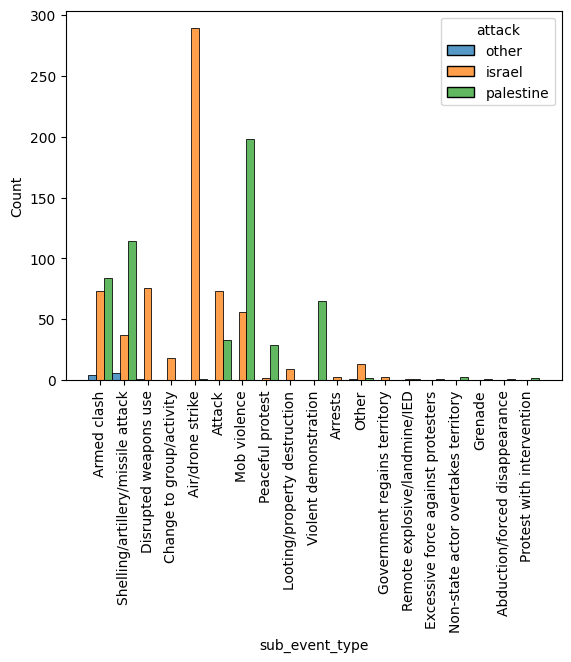

In [ ]:
sns.histplot(binwidth=1,
            x='sub_event_type',
            hue='attack',
            data=df,
            stat="count",
            multiple="dodge")
plt.xticks(rotation=90);

In [ ]:
datedf = df['event_date','actor1']

In [ ]:
df['assoc_actor_1'].value_counts()

Settlers (Israel)                                                                                                                   65
Refugees/IDPs (Palestine)                                                                                                           17
Rioters (Palestine)                                                                                                                 17
Unidentified Armed Group (Palestine)                                                                                                13
Settlers (Israel); Military Forces of Israel (2022-)                                                                                12
                                                                                                                                    ..
Commission of Detainees and Ex-Detainees Affairs; Government of Palestine (1994-) Palestinian National Authority; Fatah Movement     1
Rioters (Israel)                                       

In [ ]:
new = df["civilian_targeting"].isin(["Civilian targeting"])
newdf = df[new]

In [ ]:
newdf = df[new]

<Axes: >

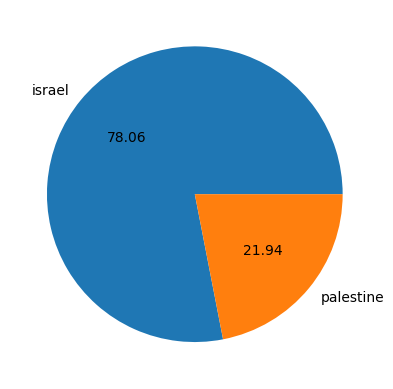

In [ ]:
from matplotlib.pyplot import pie, axis, show
newdf.groupby('attack').size().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='civilian_targeting', ylabel='Count'>

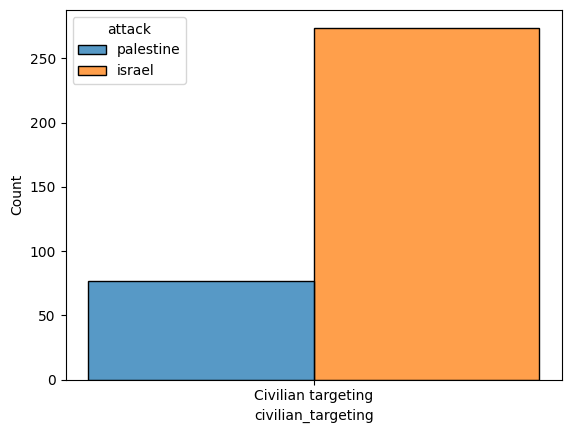

In [ ]:
sns.histplot(binwidth=1,
            x='civilian_targeting',
            hue='attack',
            data=newdf,
            stat="count",
            multiple="dodge")

In [ ]:
datedf = df[["actor1",'event_date']]

In [ ]:
datedf

,actor1,event_date
0,Hezbollah,2023-10-13
1,Hezbollah,2023-10-13
2,Military Forces of Israel (2022-),2023-10-13
3,Military Forces of Israel (2022-),2023-10-13
4,Hamas Movement,2023-10-13
...,...,...
1195,Rioters (Palestine),2023-10-05
1196,Rioters (Palestine),2023-10-05
1197,Rioters (Palestine),2023-10-05
1198,Rioters (Palestine),2023-10-05


In [ ]:
datedf.groupby(['event_date', 'actor1']).actor1.count().rename('count')

event_date  actor1                              
2023-09-01  Al Aqsa Martyrs Brigade                 1
            Hamas Movement                          1
            Protesters (Israel)                     2
            Protesters (Palestine)                  1
            Rioters (Israel)                        4
                                                   ..
2023-10-06  Protesters (Palestine)                  3
            Rioters (Israel)                        3
            Rioters (Palestine)                     5
            Settlers (Israel)                       1
            Unidentified Armed Group (Palestine)    2
Name: count, Length: 272, dtype: int64

In [ ]:
datedf.groupby(['event_date', 'actor1']).agg({'actor1':'count'}).rename({'actor1':'count'})

actor1
event_date actor1                                      
2023-09-01 Al Aqsa Martyrs Brigade                    1
           Hamas Movement                             1
           Protesters (Israel)                        2
           Protesters (Palestine)                     1
           Rioters (Israel)                           4
...                                                 ...
2023-10-06 Protesters (Palestine)                     3
           Rioters (Israel)                           3
           Rioters (Palestine)                        5
           Settlers (Israel)                          1
           Unidentified Armed Group (Palestine)       2

[272 rows x 1 columns]

In [ ]:
daily_report=datedf.groupby('event_date')['actor1'].count()
print(daily_report)

event_date
2023-10-05     20
2023-10-06     14
2023-10-07    162
2023-10-08    134
2023-10-09    206
2023-10-10    121
2023-10-11    146
2023-10-12    164
2023-10-13    233
Name: actor1, dtype: int64


In [ ]:
daily_report=daily_report.reset_index()

In [ ]:
daily_report

,event_date,actor1
0,2023-10-05,20
1,2023-10-06,14
2,2023-10-07,162
3,2023-10-08,134
4,2023-10-09,206
5,2023-10-10,121
6,2023-10-11,146
7,2023-10-12,164
8,2023-10-13,233


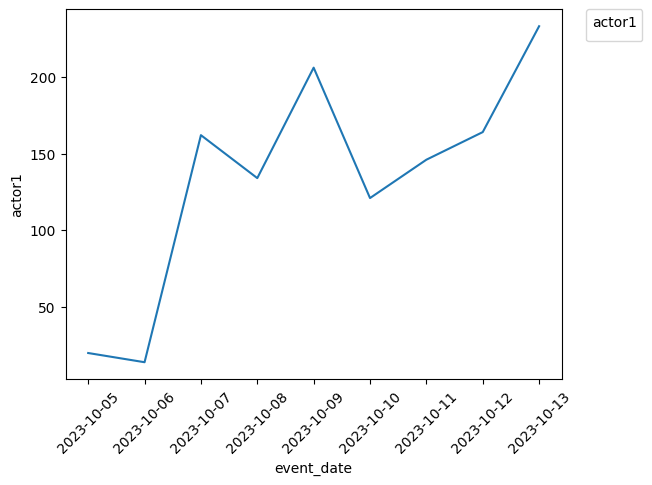

In [ ]:
sns.lineplot(data=daily_report, x='event_date', y='actor1')
plt.legend(title='actor1',bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp,attack
0,PSE36482,2023-10-06,2023,1,Demonstrations,Riots,Violent demonstration,Rioters (Palestine),Civilians (Palestine); Journalists (Palestine),5,...,32.2216,35.1447,1,Palestine News and Information Agency,National,"On 6 October 2023, Palestinians clashed with I...",0,crowd size=no report,1696881789,palestine
1,PSE36483,2023-10-06,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (Palestine),Colonization and Wall Resistance Commission,6,...,32.1310,35.1396,2,Ma'an News Agency; Palestine News and Informat...,National,"On 6 October 2023, Palestinians conducted Frid...",0,crowd size=no report,1696881789,palestine
2,PSE36484,2023-10-06,2023,1,Demonstrations,Protests,Peaceful protest,Protesters (Palestine),Commission of Detainees and Ex-Detainees Affairs,6,...,31.7049,35.2038,1,Palestine News and Information Agency,National,"On 6 October 2023, Palestinians protested in B...",0,crowd size=no report,1696881789,palestine
3,PSE36488,2023-10-06,2023,1,Demonstrations,Protests,Protest with intervention,Protesters (Palestine),Protesters (International),6,...,31.7929,35.2317,1,Dunia Al Watan; Palestine News and Information...,National,"On 6 October 2023, Israeli police physically a...",0,crowd size=no report,1696881789,palestine
4,PSE36512,2023-10-06,2023,1,Political violence,Riots,Mob violence,Rioters (Israel),Settlers (Israel),5,...,31.8718,35.2777,1,Palestine News and Information Agency; PLO Neg...,Other-National,"On 6 October 2023, Israeli settlers rioted in ...",0,crowd size=no report,1696881789,israel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,PSE35945,2023-09-01,2023,1,Political violence,Riots,Mob violence,Rioters (Israel),Settlers (Israel),5,...,32.1750,35.0575,1,PLO Negotiations Affairs Department,Other,"On 1 September 2023, Israeli settlers cut 30 P...",0,crowd size=no report,1694467483,israel
876,PSE35966,2023-09-01,2023,1,Political violence,Riots,Mob violence,Rioters (Israel),Settlers (Israel); Military Forces of Israel (...,5,...,32.1859,35.2311,1,PLO Negotiations Affairs Department,Other,"On 1 September 2023, Palestinian rioters clash...",0,crowd size=no report,1694467483,israel
877,PSE35972,2023-09-01,2023,1,Political violence,Riots,Mob violence,Rioters (Palestine),NaN,5,...,32.0089,35.1646,1,PLO Negotiations Affairs Department,Other,"On 1 September 2023, Palestinian rioters threw...",0,crowd size=no report,1694467483,palestine
878,PSE35977,2023-09-01,2023,1,Political violence,Riots,Mob violence,Rioters (Palestine),NaN,5,...,31.9162,35.1118,1,PLO Negotiations Affairs Department,Other,"On 1 September 2023, Palestinian rioters threw...",0,crowd size=no report,1694467483,palestine


In [ ]:
import plotly.express as px #,geo = dict(projection_scale=10,lo    locations =['country'] ,locationmode='country names'

In [ ]:

fig1 = px.scatter_geo(df ,  lon ='longitude' ,lat='latitude',color='attack')
fig1.update_layout(title_text='1',geo = dict(
            scope = 'asia',
            resolution = 50,
            lonaxis_range= [31.25952,35.200657],
            lataxis_range= [29.705791,32.50847],
            landcolor = 'rgb(217, 217, 217)',
        ))
fig1.show()

In [ ]:
df['assoc_actor_1'].value_counts()

Settlers (Israel)                                                                                                                   65
Refugees/IDPs (Palestine)                                                                                                           17
Rioters (Palestine)                                                                                                                 17
Unidentified Armed Group (Palestine)                                                                                                13
Settlers (Israel); Military Forces of Israel (2022-)                                                                                12
                                                                                                                                    ..
Commission of Detainees and Ex-Detainees Affairs; Government of Palestine (1994-) Palestinian National Authority; Fatah Movement     1
Rioters (Israel)                                       

In [ ]:
df['actor2'].value_counts()

Military Forces of Israel (2022-)                   383
Civilians (Palestine)                               142
Civilians (Israel)                                   67
Police Forces of Israel (2022-)                      23
Rioters (Palestine)                                  15
Hamas Movement                                       13
Rioters (Israel)                                      4
Police Forces of Israel (2022-) Border Police         4
Protesters (Israel)                                   3
Unidentified Armed Group (Palestine)                  2
Police Forces of Israel (2022-) Yamam                 2
Unidentified Armed Group (Israel)                     1
Military Forces of Israel (2022-) Special Forces      1
Police Forces of Palestine (1994-) West Bank          1
Military Forces of Palestine (1994-)                  1
Name: actor2, dtype: int64

In [ ]:
df['assoc_actor_2'].value_counts()

Settlers (Israel)                                                                                                                            55
Farmers (Palestine)                                                                                                                          28
Fishers (Palestine)                                                                                                                          16
Labor Group (Palestine)                                                                                                                       6
Police Forces of Israel (2022-) Border Police                                                                                                 3
Refugees/IDPs (Palestine)                                                                                                                     2
Muslim Group (Palestine)                                                                                                                

In [ ]:
!pip install geojson

In [ ]:
pip install shapely

In [ ]:
import folium

In [ ]:



# Create a map instance

map = folium.Map(location=[24.8170, 93.9368], zoom_start=8)

# Load  from GeoJSON file

map_geojson = '/content/drive/MyDrive/Colab Notebooks/map.geojson'

# Create a GeoJSON layer for  and add it to the map

folium.GeoJson(map_geojson,

               style_function=lambda feature: {

                   'fillColor': 'white',

                   'color': 'black',

                   'weight': 2,

                   'fillOpacity': 1

               }).add_to(map)


# Define color palette for different years

color_palette = {'palestine': 'red', 'israel': 'blue','other':'green'}

# Plot the events on the map with different colors based on the year

for index, row in df.iterrows():

    folium.CircleMarker([row['latitude'], row['longitude']],

                        radius=3,

                        color=color_palette[row['attack']],

                        fill=True,

                        fill_color=color_palette[row['attack']],

                        fill_opacity=0.5).add_to(map)

# Add map features

folium.TileLayer('cartodbpositron').add_to(map)
# Set the map's center and zoom level

map.fit_bounds(map.get_bounds())

#map.get_root().html.add_child(folium.Element(legend_html))

# Display the map

map

In [ ]:


# Create a map instance

map = folium.Map(location=[31.25997 , 34.25952], zoom_start=8)

# Load  from GeoJSON file

map_geojson = '/content/drive/MyDrive/Colab Notebooks/PSX.geojson'

# Create a GeoJSON layer for and add it to the map

folium.GeoJson(map_geojson,

               style_function=lambda feature: {

                    'fillColor': '#00000000',

                   'color': 'black',

                    'fillOpacity': .5,

                   'weight': 2,

                   'fillOpacity': 1

               }).add_to(map)


# Define color palette for different years

color_palette = {'palestine': 'red', 'israel': 'blue','other':'green'}

# Plot the events on the map with different colors based on the year

for index, row in df.iterrows():

    folium.CircleMarker([row['latitude'], row['longitude']],

                        radius=3,

                        color=color_palette[row['attack']],

                        fill=True,

                        fill_color=color_palette[row['attack']],

                        fill_opacity=0.5).add_to(map)

# Add map features

folium.TileLayer('cartodbpositron').add_to(map)
# Set the map's center and zoom level

map.fit_bounds(map.get_bounds())

#map.get_root().html.add_child(folium.Element(legend_html))

# Display the map

map

In [ ]:
import folium

import json







# Calculate the event count for each location

event_counts = df.groupby(['latitude', 'longitude']).size().reset_index(name='count')


# Create a map instance

map = folium.Map(location=[31.25997 , 34.25952], zoom_start=8)


# Load from GeoJSON file

with open('/content/drive/MyDrive/Colab Notebooks/PSX.geojson') as f:

    map_geojson = json.load(f)


# Create a GeoJSON layer for  and add it to the map

folium.GeoJson(map_geojson,

               style_function=lambda feature: {

                   'fillColor': '#00000000',

                   'color': 'black',

                   'weight': 2,

                   'fillOpacity': 1

               }).add_to(map)


# Define a custom color palette inspired by ACLED thematic categories

event_type_palette = {

    'Violence against civilians': '#FF5C5C',       # Dark orange

    'Explosions/Remote violence': '#FFC94C',       # Bright yellow

    'Strategic developments': '#FF9633',            # Light orange

    'Battles': '#8E8EE1',                           # Purple

    'Protests': '#72C472',                          # Green

    'Riots': '#0818A8'                              # Zaffre

}

# Plot the events on the map with varying marker size and color based on
# the event type and frequency

for index, row in event_counts.iterrows():

    location = (row['latitude'], row['longitude'])

    count = row['count']


    # Get the event type for the current location

    event_type = df[(df['latitude'] == row['latitude']) &

                             (df['longitude'] == row['longitude'])]['event_type'].values[0]


    folium.CircleMarker(

        location=location,

        radius=2 + count * 0.1,

        color=event_type_palette[event_type],

        fill=True,

        fill_color=event_type_palette[event_type],

        fill_opacity=0.7

    ).add_to(map)


# Add legends for the year 2023

legend_html = """

<div style="position: fixed; bottom: 50px; right: 50px; z-index: 1000; font-size: 14px;

             background-color: rgba(255, 255, 255, 0.8); padding: 10px; border-radius:
             5px;">

    <p><strong>Legend</strong></p>

    <p><span style="color: #FF5C5C;">Violence against civilians</span></p>

    <p><span style="color: #FFC94C;">Explosions/Remote violence</span></p>

    <p><span style="color: #FF9633;">Strategic developments</span></p>

    <p><span style="color: #8E8EE1;">Battles</span></p>

    <p><span style="color: #72C472;">Protests</span></p>

    <p><span style="color: #0818A8;">Riots</span></p>

</div>

"""
map.get_root().html.add_child(folium.Element(legend_html))



# Display the map

map

Reference:

1- Benny, D. (2023). Exploring conflict Trends and Patterns: Manipur ACLED Data analysis. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2023/06/exploring-conflict-trends-and-patterns-manipur-acled-data-analysis/

2- ACLED. (2023, October 13). ACLED | Bringing Clarity to Crisis. https://acleddata.com/

3-Mapbox. (n.d.). geojson.io | powered by Mapbox. geojson.io. https://geojson.io/#map=7.2/31.75/34.804

4- Belorkar, A., Guntuku, S. C., & Hora, S. (2020). Interactive Data Visualization with Python - Second Edition: Present Your Data as an Effective and Compelling Story.

5- How do I select a subset of a DataFrame? — pandas 2.1.1 documentation. (n.d.). https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html


In [ ]:
df['geo_precision'].value_counts()

1    646
2    233
3      1
Name: geo_precision, dtype: int64

In [ ]:
#df['attack'] = np.where(df['actor1'].isin(Palestine),df['actor1'], 'palestine')
#df['attack'] = np.where(df['actor1'].isin(israel), df['actor1'], 'israel')

In [ ]:
pip install Shapely 1.6.4.post2 cp27 cp27m win_amd64.whl

ERROR: win_amd64.whl is not a valid wheel filename.


In [ ]:
#df.loc[df['actor1'].isin.Palestine ,'attack'] = 'palestine'

In [ ]:
#df['attack'] = df['actor1'].where(df['actor1'].isin(Palestine), 'palestine')
#df['attack'] = df['actor1'].where(df['actor1'].isin(israel), 'israel')

In [ ]:
import json
import geojson
from functools import partial
import pyproj
#import shapely.geometry.asShape
import shapely.ops
import shapely.geometry


# reading into two geojson objects, in a GCS (WGS84)
with open('/content/drive/MyDrive/Colab Notebooks/PSX.geojson') as geojson1:
    poly1_geojson = json.load(geojson1)

with open('/content/drive/MyDrive/Colab Notebooks/ISR.geojson') as geojson2:
    poly2_geojson = json.load(geojson2)


# pulling out the polygons
poly1 = shapely.geometry.asShape(poly1_geojson['features'][2]['geometry'])
poly2 = shapely.geometry.asShape(poly2_geojson['features'][2]['geometry'])

# checking to make sure they registered as polygons
print (poly1.geom_type)
print (poly2.geom_type)

# merging the polygons - they are feature collections, containing a point, a polyline, and a polygon - I extract the polygon
# for my purposes, they overlap, so merging produces a single polygon rather than a list of polygons
mergedPolygon = poly1.union(poly2)

# using geojson module to convert from WKT back into GeoJSON format
geojson_out = geojson.Feature(geometry=mergedPolygon, properties={})

# outputting the updated geojson file - for mapping/storage in its GCS format
with open('Merged_Polygon.json', 'w') as outfile:
    json.dump(geojson_out.geometry, outfile, indent=3, encoding="utf-8")
outfile.close()

# reprojecting the merged polygon to determine the correct area
# it is a polygon covering much of the US, and dervied form USGS data, so using Albers Equal Area
project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'),
    pyproj.Proj(init='epsg:5070'))

mergedPolygon_proj = shapely.ops.transform(project,mergedPolygon)

AttributeError: ignored